# SpaceX Fırlatma Verileri Graf Analizi

Bu notebook, SpaceX'in fırlatma verilerini graf analizi yöntemleriyle incelemektedir. Analiz, aşağıdaki ana başlıkları içermektedir:

1. Veri Yükleme ve Graf Oluşturma
2. Graf Analizi

In [1]:
!pip install python-arango
!pip install python-arango networkx matplotlib seaborn pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 2.4 MB/s eta 0:00:00


## 1. Gerekli Kütüphanelerin Yüklenmesi

In [3]:
from arango import ArangoClient
import networkx as nx
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns


# Basit görselleştirme ayarları
sns.set()  # Sadece temel seaborn ayarlarını kullan
%matplotlib inline


In [4]:
# En basit bağlantı denemesi
client = ArangoClient(
    hosts='https://4641197b9b9e.arangodb.cloud:8529'
)

try:
    db = client.db('_system', username='root', password='5JVAlOqBr0AiAvD2elw0')
    print("Bağlantı başarılı!")

    # Koleksiyonları listele
    collections = db.collections()
    print("\nMevcut koleksiyonlar:")
    for collection in collections:
        print(f"- {collection['name']}")

except Exception as e:
    print(f"Hata: {str(e)}")

Bağlantı başarılı!

Mevcut koleksiyonlar:
- nodes
- _graphs
- _statistics
- _statistics15
- _queues
- edges
- _analyzers
- _jobs
- _aqlfunctions
- _statisticsRaw
- _apps
- _frontend
- _appbundles


Detaylı Graf Analizi Başlıyor...

1. Yörünge Analizi:

LEO Yörüngesi:
- Bağlı payload sayısı: 7
- Örnek payload'lar:
  * Orbcomm-OG2
  * Orbcomm-OG2-1
  * Orbcomm-OG2-2
  * ... ve 4 tane daha

GTO Yörüngesi:
- Bağlı payload sayısı: 13
- Örnek payload'lar:
  * SES-9
  * JCSAT-14
  * JCSAT-16
  * ... ve 10 tane daha

SSO Yörüngesi:
- Bağlı payload sayısı: 3
- Örnek payload'lar:
  * Paz
  * CSG-2
  * NROL-87

MEO Yörüngesi:
- Bağlı payload sayısı: 0

Sub-orbital Yörüngesi:
- Bağlı payload sayısı: 0

Heliocentric Yörüngesi:
- Bağlı payload sayısı: 0


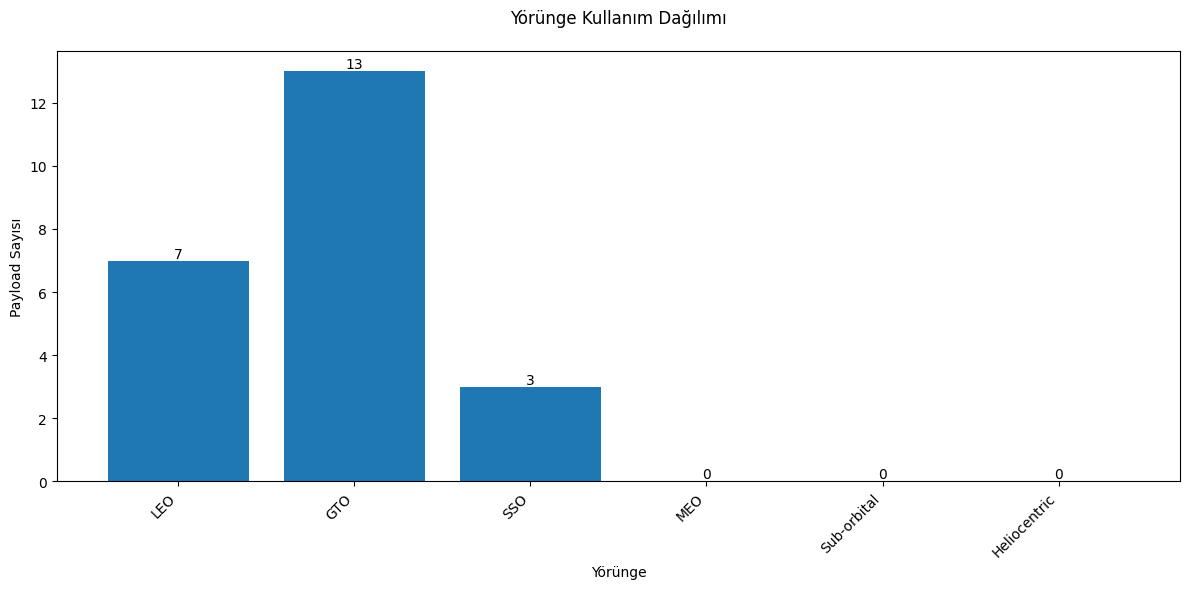


2. Müşteri Analizi:


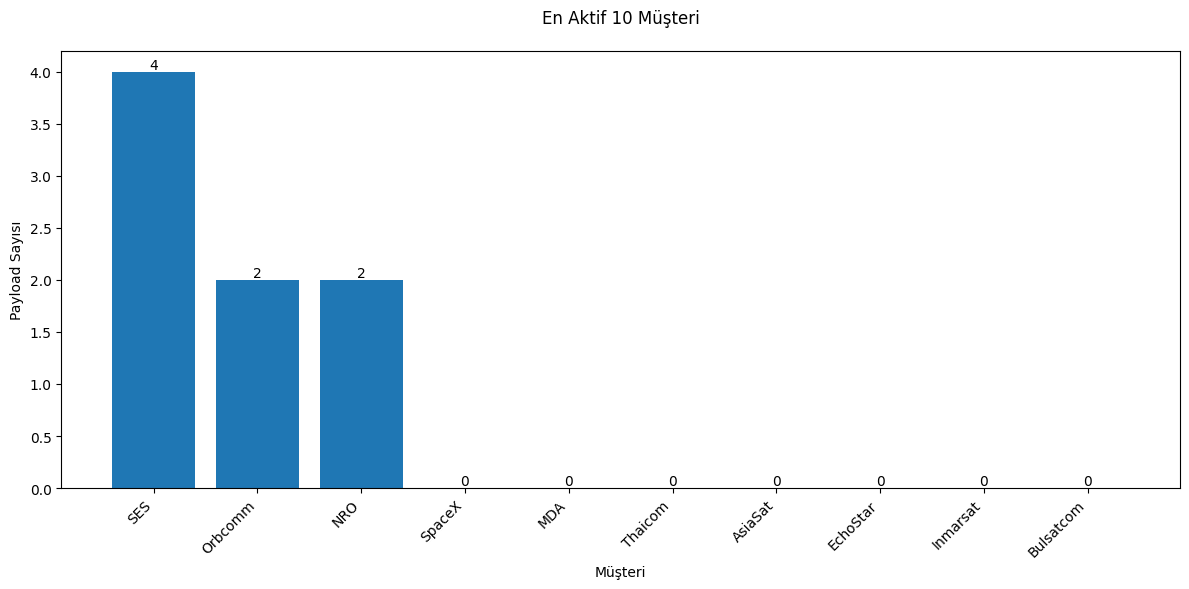


3. Ağ Merkeziliği Analizi:

En Merkezi Düğümler (Degree Centrality):
- Bilinmeyen (Bilinmeyen): 0.185
- Bilinmeyen (Bilinmeyen): 0.174
- GTO (orbit): 0.152
- Bilinmeyen (Bilinmeyen): 0.130
- Bilinmeyen (Bilinmeyen): 0.109

Detaylı analiz tamamlandı.


In [ ]:
try:
    print("Detaylı Graf Analizi Başlıyor...")

    # 1. Yörünge (Orbit) Analizi
    print("\n1. Yörünge Analizi:")
    orbit_nodes = [n for n in G.nodes(data=True) if n[1].get('type') == 'orbit']
    orbit_connections = {}

    for orbit in orbit_nodes:
        orbit_name = orbit[1].get('name', 'Bilinmeyen')
        # Yörüngeye bağlı payload'ları bul
        connected_payloads = [G.nodes[n].get('name', 'Bilinmeyen')
                            for n in G.neighbors(orbit[0])
                            if G.nodes[n].get('type') == 'payload']
        orbit_connections[orbit_name] = connected_payloads

        print(f"\n{orbit_name} Yörüngesi:")
        print(f"- Bağlı payload sayısı: {len(connected_payloads)}")
        if connected_payloads:
            print("- Örnek payload'lar:")
            for payload in connected_payloads[:3]:
                print(f"  * {payload}")
            if len(connected_payloads) > 3:
                print(f"  * ... ve {len(connected_payloads)-3} tane daha")

    # Yörünge kullanım grafiği
    plt.figure(figsize=(12, 6))
    orbit_usage = {k: len(v) for k, v in orbit_connections.items()}
    bars = plt.bar(orbit_usage.keys(), orbit_usage.values())
    plt.title('Yörünge Kullanım Dağılımı', pad=20)
    plt.xlabel('Yörünge')
    plt.ylabel('Payload Sayısı')
    plt.xticks(rotation=45, ha='right')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # 2. Müşteri (Customer) Analizi
    print("\n2. Müşteri Analizi:")
    customer_nodes = [n for n in G.nodes(data=True) if n[1].get('type') == 'customer']
    customer_payloads = {}

    for customer in customer_nodes:
        customer_name = customer[1].get('name', 'Bilinmeyen')
        # Müşteriye bağlı payload'ları bul
        connected_payloads = [G.nodes[n].get('name', 'Bilinmeyen')
                            for n in G.neighbors(customer[0])
                            if G.nodes[n].get('type') == 'payload']
        customer_payloads[customer_name] = connected_payloads

    # En aktif müşterileri görselleştir
    plt.figure(figsize=(12, 6))
    customer_activity = {k: len(v) for k, v in customer_payloads.items()}
    # En çok payload'ı olan ilk 10 müşteri
    top_customers = dict(sorted(customer_activity.items(),
                              key=lambda x: x[1],
                              reverse=True)[:10])

    bars = plt.bar(top_customers.keys(), top_customers.values())
    plt.title('En Aktif 10 Müşteri', pad=20)
    plt.xlabel('Müşteri')
    plt.ylabel('Payload Sayısı')
    plt.xticks(rotation=45, ha='right')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # 3. Ağ Merkeziliği Analizi
    print("\n3. Ağ Merkeziliği Analizi:")
    # Degree centrality
    degree_cent = nx.degree_centrality(G)
    # Betweenness centrality
    between_cent = nx.betweenness_centrality(G)

    # En merkezi 5 düğümü bul
    top_nodes = sorted([(G.nodes[node].get('name', 'Bilinmeyen'),
                        G.nodes[node].get('type', 'Bilinmeyen'),
                        score)
                       for node, score in degree_cent.items()],
                      key=lambda x: x[2],
                      reverse=True)[:5]

    print("\nEn Merkezi Düğümler (Degree Centrality):")
    for name, node_type, score in top_nodes:
        print(f"- {name} ({node_type}): {score:.3f}")

except Exception as e:
    print(f"\nHata oluştu: {str(e)}")
    import traceback
    traceback.print_exc()

finally:
    print("\nDetaylı analiz tamamlandı.")